In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<ipython-input-5-5c2430bf1347>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Category"], palette='pastel')


<Axes: xlabel='count', ylabel='Category'>

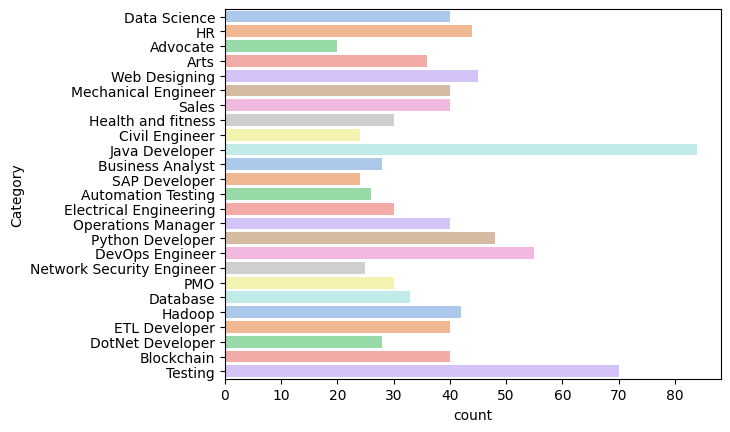

In [5]:
sns.countplot(df["Category"], palette='pastel')

In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
df['Category'][0]

'Data Science'

In [8]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [9]:
# cleaning data
#1.   URLs
#2. hashtags
#3. mentions
#4. special letters
#5. punctuations

import re
def cleaned_text(txt):
    cleanText=re.sub("http[s]?\://\S+","",txt) #removing the the hyperlinks
    cleanText=re.sub(r"#\S+", "",cleanText) #removing the hashtags
    cleanText=re.sub(r"@\S+", "",cleanText) #removing the mentions
    cleanText=re.sub(r'[^A-Za-z0-9\s]+', '', cleanText) #removing the special letters
    cleanText=re.sub(r'[^\w\s]','',cleanText)
    cleanText = re.sub(r'[\r\n]+', ' ', cleanText)
    return cleanText


In [10]:
cleaned_text('my ass# is #3 http//:linkdein.haris-roy-pulinilkunnathil+@gmail\n\r.com')

'my ass is  httplinkdeinharisroypulinilkunnathil com'

In [11]:
df['Resume']=df['Resume'].apply(lambda x: cleaned_text(x))

In [12]:
df['Resume'].count()

962

In [13]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details  Data Science Assurance Associate  Data Science Assurance Associate  Ernst  Young LLP Skill Details  JAVASCRIPT Exprience  24 months jQuery Exprience  24 months Python Exprience  24 monthsCompany Details  company  Ernst  Young LLP description  Fraud Investigations and Dispute Services   Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in ac

In [14]:
# Converting words into categorical values
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#creating initial dataframe
type_of_resumes=('Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing')
resume_df=pd.DataFrame(type_of_resumes,columns=['Type_of_resumes'])

#creating instance of label encoding
labelencoder= LabelEncoder()

#Assigning numerical values and strong in another coloumn
resume_df['Type_of_resumes_cat']= labelencoder.fit_transform(resume_df['Type_of_resumes'])
print(resume_df)


'''Alternative method
  from sklearn.preprocessing import LabelEncoder
  le=LabelEncoder()
  le.fit(df['Category'])
  df['Category']=le.transform(df[df['Category']])'''


              Type_of_resumes  Type_of_resumes_cat
0                Data Science                    6
1                          HR                   12
2                    Advocate                    0
3                        Arts                    1
4               Web Designing                   24
5         Mechanical Engineer                   16
6                       Sales                   22
7          Health and fitness                   14
8              Civil Engineer                    5
9              Java Developer                   15
10           Business Analyst                    4
11              SAP Developer                   21
12         Automation Testing                    2
13     Electrical Engineering                   11
14         Operations Manager                   18
15           Python Developer                   20
16            DevOps Engineer                    8
17  Network Security Engineer                   17
18                        PMO  

"Alternative method\n  from sklearn.preprocessing import LabelEncoder\n  le=LabelEncoder()\n  le.fit(df['Category'])\n  df['Category']=le.transform(df[df['Category']])"

In [15]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [16]:
 #vectorisation
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details  Data Science Assurance Associate  Data Science Assurance Associate  Ernst  Young LLP Skill Details  JAVASCRIPT Exprience  24 months jQuery Exprience  24 months Python Exprience  24 monthsCompany Details  company  Ernst  Young LLP description  Fraud Investigations and Dispute Services   Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in ac

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=df['Resume']
vectorizer=TfidfVectorizer()
tfidf=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(corpus)

In [18]:
vectorizer.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

In [19]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May 2013 to May 2017 BE U...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,Education Details MCA YMCAUST Faridabad ...


In [20]:
print(X.shape)

(962, 8105)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df['Category'],test_size=0.2, random_state=42)

In [22]:
X_train.shape

(769, 8105)

In [23]:
X_test.shape

(193, 8105)

In [24]:
# Building the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
#Training the model and predict
k=4
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0, 

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9844559585492227


In [26]:
print('classification Report:',classification_report(y_test,y_pred))


classification Report:                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       0.71      1.00      0.83         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

In [29]:
#calculating accuracy on trianing and test set using the gamma parameter with 5-fold cross validation
parameter_range= np.arange(1,10,1)
train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")

In [31]:
#calculating  mean and standard deviation of training score
mean_training_score=np.mean(train_score, axis=1)
std_train_score=np.std(train_score, axis=1)

#mean and standard deviation of testigng score
mean_test_score=np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)



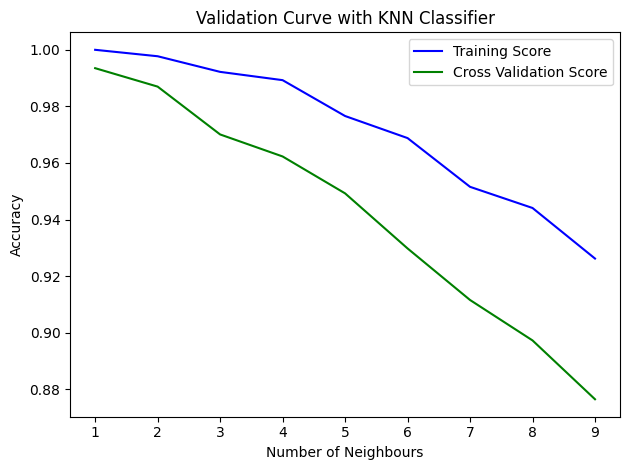

In [35]:
#Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_training_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve for KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [47]:
# Building the application
!pip install joblib

In [60]:
import joblib

#saving the model with joblib
filename='KNN_Model.sav'
joblib.dump(neigh,filename)

#saving the tf-idf vectorizer of the model for later use
joblib.dump(vectorizer,'vectorizer.pkl')


['vectorizer.pkl']

In [61]:
#load model with joblib
loaded_model=joblib.load(filename)
# evaluate model
y_predict= neigh.predict(X_test)

# check resulsts
print(classification_report(y_test, y_predict))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       0.71      1.00      0.83         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

In [62]:
myresume='''
HARIS ROY PULINILKUNNATHIL
⋄ London ⋄ Contact: xxxxxxxxx ⋄ xxxxxx@gmail.com ⋄ Linkedin ⋄ GitHub
PROFESSIONAL SUMMARY
Dynamic and highly motivated data science professional with a Master’s degree in Data Science and a Bachelor’s
degree in Mathematics. Seeking an opportunity to join a progressive organisation’s graduate training programme,
with a focus on HR Technology, where I can apply my analytical skills, technical expertise, and passion for continuous
learning to contribute to the company’s growth and success.
EDUCATION
MSc in Data Science, Distinction, University of Sussex, United Kingdom Sep 2022 - Nov 2023
Relevant Coursework: Machine Learning, Natural Language Processing
BSc in Mathematics, First Class, Kannur University, India Jun 2018 - Sep 2021
Relevant Coursework: Statistics, Physics
SKILLS
• Proficient in data analysis, Machine Learning, Natural Language Processing and statistical modeling
• Strong programming skills in Python, R, and SQL.
• Excellent problem-solving and decision-making abilities.
• Experience with cloud technologies like AWS.
• Excellent problem-solving abilities and attention to detail
• Effective communication and interpersonal skills
• Ability to work collaboratively in a team environment and independently when required
• Adaptable and eager to learn new technologies and methodologies
EXPERIENCE
Machine Learning Contributer Jan 2024 - Present
Unify London, UK
• Actively participated in open-source community, addressing bugs, improving stability, and collaborating with
developers and contributing to documentation.
Data Science and Analytics Internship Oct 2023 - Dec 2023
Oasis Infobyte New Delhi, India
• Analysed labour market data using Python to identify trends and insights related to unemployment rates and
presented to stakeholders.
• Generated actionable recommendations to address unemployment challenges based on data-driven insights.
• Developed a regression model (Linear regression) model to predict car prices and their sales, incorporating
features like brand, mileage, and year of manufacture.
PROJECTS
Stock Market Forecasting using Deep Learning: Accurately forecast future stock prices for the NIFTY-50 Index
in the Indian Stock Market, utilising regression techniques. Achieved enhanced performance through hyperparameter
tuning and implementing various machine and deep learning models, including K-Nearest Neighbours (K-NN), LSTM,
GRU, and a unique hybrid neural network architecture combining LSTM and GRU layers based on a research paper.-
Numpy, Pandas, matplotlib, Seaborn, Sci-kit learn, Tensorflow, Keras
Chatbot using Falcon: Designed, developed, and deployed ChatBot-Falcon1, a state-of-the-art chatbot powered
by the Falcon- 7B language model. Conducted rigorous testing and fine-tuning to ensure high accuracy and user
satisfaction.- Langchain, Huggingface, Transformers
Dry Beans Classification: Successfully classified seven types of dry beans from a dataset of 13,611 images using
optimized machine learning models. Achieved 92.69% accuracy with Support Vector Machines (SVM) and 92.94%
with Gradient Boosting Classifier (GBC). Conducted Exploratory Data Analysis (EDA), pre-processed data, and
applied feature scaling. Utilized primary model SVM, fine-tuned with GridSearchCV and BayesSearchCV. Developed
and assessed GBC model for agricultural bean sorting and grading, demonstrating expertise in data analysis and
modeling.- Numpy, Pandas, Seaborn, Sci-kit learn
Propoganda detection: Effectively classified textual propaganda, demonstrating expertise in natural language
processing. Integrated various methods, including word embeddings (word2vec, GloVe), neural language models
(GRU ensemble, BERT), and logistic regression techniques to achieve accurate results.-Numpy, Pandas, Seaborn,
spaCy, Sci-kit learn, Tensorflow, Transformers
ACHIEVEMENTS AND EXTRA-CURRICULAR ACTIVITIES
• Actively write blog posts about Machine Learning, Natural Language Processing and Data Science.
• Achieved an overall band of 7 in the IELTS Academic exam in April 2022.
• Volunteered for National Service Scheme (NSS)
• Part of the student’s union in Kannur University
• Volunteered at local community organisations, organising events and fundraisers to support education and
environmental causes.
                           '''

In [63]:
joblib.dump(neigh,filename)

['KNN_Model.sav']

In [68]:
#calling the saved model
model_recalling=joblib.load('KNN_Model.sav')
#recalling the tfidf model
vectorizer=joblib.load('vectorizer.pkl')

#clean the input resume
cleaned_resume=cleaned_text(myresume)

#transform the cleaned resume using trained tfidfvector
input_features=vectorizer.transform([cleaned_resume])

#make the prediction using the loaded classifier
prediction_id=neigh.predict(input_features)[0]

#mapping category ID to category name
category_mapping={
    "Data Science": 6,
    "HR": 12,
    "Advocate": 0,
    "Arts": 1,
    "Web Designing": 24,
    "Mechanical Engineer": 16,
    "Sales": 22,
    "Health and fitness": 14,
    "Civil Engineer": 5,
    "Java Developer": 15,
    "Business Analyst": 4,
    "SAP Developer": 21,
    "Automation Testing": 2,
    "Electrical Engineering": 11,
    "Operations Manager": 18,
    "Python Developer": 20,
    "DevOps Engineer": 8,
    "Network Security Engineer": 17,
    "PMO": 19,
    "Database": 7,
    "Hadoop": 13,
    "ETL Developer": 10,
    "DotNet Developer": 9,
    "Blockchain": 3,
    "Testing": 23
}

category_name = category_mapping.get(prediction_id,'Unknown')

print(prediction_id)

Data Science
